# Inlet Analysis
Looking at how many inlets influence each node

In [1]:
import sys
sys.path.append('../')
from src.util import *
import numpy as np 
import snap
from tqdm import tqdm
import collections
import matplotlib.pyplot as plt

### Load in the networks
Sanity check number of nodes and edges

In [2]:
G_LS174t = snap.LoadEdgeList(snap.PNEANet, "../data/Edgelist/LS174T_clean_EdgesList.txt", 0, 1)
G_SW1222 = snap.LoadEdgeList(snap.PNEANet, "../data/Edgelist/SW1222_clean_EdgesList.txt", 0, 1)
G_Healthy = snap.LoadEdgeList(snap.PNEANet, "../data/Edgelist/Mesentery_clean_EdgeList.txt", 0, 1)

print "Healthy Network - Number of nodes: {}, Number of Edges {}".format(G_Healthy.GetNodes(), G_Healthy.GetEdges())
print "LS174T Tumour - Number of nodes: {}, Number of Edges {}".format(G_LS174t.GetNodes(), G_LS174t.GetEdges())
print "SW1222 Tumour - Number of nodes: {}, Number of Edges {}".format(G_SW1222.GetNodes(), G_SW1222.GetEdges())

Healthy Network - Number of nodes: 388, Number of Edges 545
LS174T Tumour - Number of nodes: 18093, Number of Edges 29030
SW1222 Tumour - Number of nodes: 72084, Number of Edges 124158


In [3]:
def generateInletCounts(G):
    inlets = getInletIds(G)
    nodeIds = [node.GetId() for node in G.Nodes()]
    inletCounts = collections.defaultdict(int)
    for inlet in tqdm(inlets):
        outSet = snap.GetBfsTree(G, inlet, True, False)
        for node in outSet.Nodes():
            inletCounts[node.GetId()] += 1
    return inletCounts

In [4]:
inletCounts = generateInletCounts(G_LS174t)
sortedCounts_LS = sorted(inletCounts.values())
xvals_LS = range(len(sortedCounts_LS))

100%|██████████| 1795/1795 [00:01<00:00, 935.35it/s]


In [5]:
inletCounts = generateInletCounts(G_SW1222)
sortedCounts_SW = sorted(inletCounts.values())
xvals_SW = range(len(sortedCounts_SW))

100%|██████████| 8170/8170 [00:50<00:00, 160.76it/s]


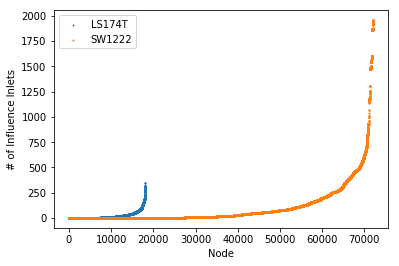

In [6]:
plt.scatter(xvals_LS, sortedCounts_LS, s=1, label='LS174T')
plt.scatter(xvals_SW, sortedCounts_SW, s=1, label='SW1222')
plt.xlabel('Node')
plt.ylabel('# of Influence Inlets')
plt.legend()

### Plot cumulative distribution that is normalised

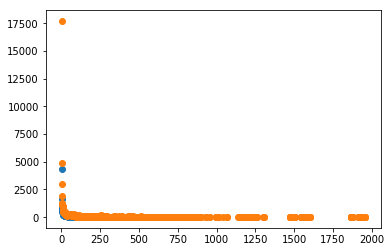

In [ ]:
plt.scatter(collections.Counter(sortedCounts_LS).keys(), collections.Counter(sortedCounts_LS).values())
plt.scatter(collections.Counter(sortedCounts_SW).keys(), collections.Counter(sortedCounts_SW).values())